In [2]:
#import pandas as pd
#import json
import networkx as nx

In [3]:
import sys
sys.path.append("../pysad")
#import pysad
#import pysad.utils
import pysad.exploration
import pysad.synthesis
import pysad.graph
from pysad.NodeInfo import SynthNodeInfo

In [4]:
sys.path.append("../littleballoffur")

In [5]:
from littleballoffur.dataset import GraphReader

In [6]:
import test_module

# Creating the graph

In [232]:
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)
importlib.reload(test_module)

<module 'test_module' from '/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py'>

In [8]:
data_path = '../synthesis/'


In [326]:
graph_type = 'real'
if graph_type == 'BA':
    graphname = 'Barabasi-Albert graph'
    nodes = 50000
    edges_per_node = 5
    G = nx.barabasi_albert_graph(nodes, edges_per_node)
elif graph_type == 'ER':
    graphname = 'Erdos-Renyi graph'
    nb_nodes = 50000
    nb_edges = 200000
    G = nx.gnm_random_graph(nb_nodes, nb_edges)
elif graph_type == 'real':
    graphname = 'real network (Facebook)'
    reader = GraphReader("facebook")
    G = reader.get_graph()
else:
    raise ValueError('Unknow graph type.')
graph_handle = pysad.synthesis.SyntheticNetwork(G)
G.graph['name'] = graphname

In [10]:
print('Graph info')
print('----------')
print('graph type:',G.graph['name'])
print('nb of nodes:',G.number_of_nodes(),', nb of edges:',G.number_of_edges())
# print('Diameter:', nx.diameter(G))

Graph info
----------
graph type: Real network
nb of nodes: 22470 , nb of edges: 171002


## Statistics of propagation

In [212]:
import numpy as np
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)

<module 'pysad.synthesis' from '../pysad/pysad/synthesis.py'>

In [243]:
graph_handle.rules['min_degree'] = 1
params = {'nb_iter' : 1, 'exploration_depth' : 6,
            'initial_node' : None, 'random_subset_size' : 0.2, 'balltype' : 'spikyball'}
node_spiky,graph_spiky = test_module.ball_test(graph_handle,params)
# dictionary with each node as key and its degree as value
degree_spiky = dict(graph_spiky.degree()) #G.degree(node_spiky.keys()))
print('subgraph: nb of nodes:',graph_spiky.number_of_nodes(),', edges:',graph_spiky.number_of_edges())

-- experiment 0 --
Initial node 1245
new edges: 13 subset: 3 in_edges: 0
new edges: 1583 subset: 317 in_edges: 9
new edges: 12822 subset: 2564 in_edges: 5367
new edges: 20182 subset: 4036 in_edges: 36440
new edges: 27608 subset: 5522 in_edges: 40028
new edges: 26329 subset: 5266 in_edges: 51318
subgraph: nb of nodes: 6956 , edges: 91721


In [246]:
graph_handle.rules['min_degree'] = 1
params = {'nb_iter' : 1, 'exploration_depth' : 6,
            'initial_node' : None, 'random_subset_size' : 0.2, 'balltype' : 'fireball'}
node_fire, graph_fire = test_module.ball_test(graph_handle,params)
# dictionary with each node as key and its degree as value
degree_fire = dict(graph_fire.degree()) #dict(G.degree(node_fire.keys()))
#print('subgraph: nb of nodes:',len(degree_fire))
print('subgraph: nb of nodes:',graph_fire.number_of_nodes(),', edges:',graph_fire.number_of_edges())

-- experiment 0 --
Initial node 9994
new edges: 23 subset: 5 in_edges: 0
new edges: 127 subset: 25 in_edges: 17
new edges: 784 subset: 157 in_edges: 170
new edges: 5534 subset: 1107 in_edges: 1006
new edges: 27456 subset: 5491 in_edges: 14054
new edges: 38031 subset: 7606 in_edges: 62785
subgraph: nb of nodes: 3998 , edges: 51149


In [235]:
graph_handle.rules['min_degree'] = 1
params_snowball = {'nb_iter' : 1, 'exploration_depth' : 4,
            'initial_node' : None, 'random_subset_size' : 1, 'balltype' : 'spikyball'}
node_snowball, graph_snowball = test_module.ball_test(graph_handle,params_snowball)
# dictionary with each node as key and its degree as value
degree_snowball = dict(graph_snowball.degree()) #dict(G.degree(node_snowball.keys()))
print('subgraph: nb of nodes:',len(degree_snowball))

-- experiment 0 --
Initial node 20464
new edges: 6 subset: 6 in_edges: 0
new edges: 320 subset: 320 in_edges: 10
new edges: 7128 subset: 7128 in_edges: 3875
new edges: 50085 subset: 50085 in_edges: 70455
subgraph: nb of nodes: 4089


In [280]:
from littleballoffur import MetropolisHastingsRandomWalkSampler, ForestFireSampler, SnowBallSampler

number_of_nodes = int(0.2*G.number_of_nodes())

sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = number_of_nodes)
new_graph = sampler.sample(G)

sampler = ForestFireSampler(number_of_nodes = number_of_nodes, p=0.2)
fire_graph = sampler.sample(G)


sampler = SnowBallSampler(number_of_nodes = number_of_nodes)
snow_graph = sampler.sample(G)


In [281]:
dlist_metro = dict(new_graph.degree()).values()
dlist_lbof_fire = dict(fire_graph.degree()).values()
dlist_lbof_snow = dict(snow_graph.degree()).values()
dlist_full_graph = dict(G.degree()).values()

## Degree distribution

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.5)

/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:64: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:66: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


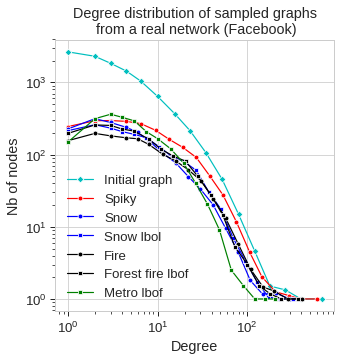

In [327]:
dlist_spiky = test_module.expand_degrees(node_spiky, degree_spiky)
dlist_snow = test_module.expand_degrees(node_snowball, degree_snowball)
dlist_fire = test_module.expand_degrees(node_fire, degree_fire)

density=False

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')
#lin_x,lin_y = test_module.degree_distribution(dlist_spiky, mode='lin')
#plt.scatter(lin_x,lin_y,c='r',marker='x',s=10)

log_x,log_y = test_module.degree_distribution(dlist_full_graph, mode='log',density=density)
sns.lineplot(log_x,log_y,c='c',marker='D',label='Initial graph')

log_x,log_y = test_module.degree_distribution(dlist_spiky, mode='log',density=density)
sns.lineplot(log_x,log_y,c='r',marker='o',label='Spiky')

#lin_x,lin_y = test_module.degree_distribution(dlist_snow, mode='lin')
#plt.scatter(lin_x,lin_y,c='b',marker='x',s=10)
log_x,log_y = test_module.degree_distribution(dlist_snow, mode='log',density=density)
sns.lineplot(log_x,log_y,c='b',marker='o',label='Snow')

log_x,log_y = test_module.degree_distribution(dlist_lbof_snow, mode='log',density=density)
sns.lineplot(log_x,log_y,c='b',marker='s',label='Snow lbol')

log_x,log_y = test_module.degree_distribution(dlist_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='o',label='Fire')

log_x,log_y = test_module.degree_distribution(dlist_lbof_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='s',label='Forest fire lbof')

log_x,log_y = test_module.degree_distribution(dlist_metro, mode='log',density=density)
line1 = sns.lineplot(log_x,log_y,c='g',marker='s',label='Metro lbof')

#line1.set_dashes([2, 2, 10, 2])

#plt.xlim((1e-4,1e-1))
#plt.ylim((.9,1e4))
plt.xlabel('Degree')
plt.ylabel('Nb of nodes')
plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + "degree_distrib.png")

/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:64: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:66: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


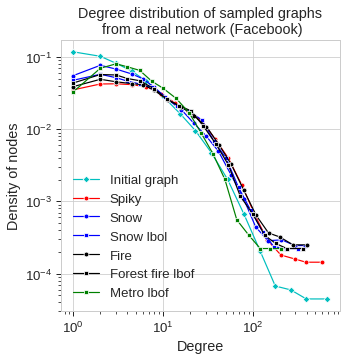

In [328]:

density=True

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

#lin_x,lin_y = test_module.degree_distribution(dlist_spiky, mode='lin')
#plt.scatter(lin_x,lin_y,c='r',marker='x',s=10)

log_x,log_y = test_module.degree_distribution(dlist_full_graph, mode='log',density=density)
sns.lineplot(log_x,log_y,c='c',marker='D',label='Initial graph')

log_x,log_y = test_module.degree_distribution(dlist_spiky, mode='log',density=density)
sns.lineplot(log_x,log_y,c='r',marker='o',label='Spiky')

#lin_x,lin_y = test_module.degree_distribution(dlist_snow, mode='lin')
#plt.scatter(lin_x,lin_y,c='b',marker='x',s=10)
log_x,log_y = test_module.degree_distribution(dlist_snow, mode='log',density=density)
sns.lineplot(log_x,log_y,c='b',marker='o',label='Snow')

log_x,log_y = test_module.degree_distribution(dlist_lbof_snow, mode='log',density=density)
sns.lineplot(log_x,log_y,c='b',marker='s',label='Snow lbol')

log_x,log_y = test_module.degree_distribution(dlist_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='o',label='Fire')

log_x,log_y = test_module.degree_distribution(dlist_lbof_fire, mode='log',density=density)
sns.lineplot(log_x,log_y,c='k',marker='s',label='Forest fire lbof')

log_x,log_y = test_module.degree_distribution(dlist_metro, mode='log',density=density)
sns.lineplot(log_x,log_y,c='g',marker='s',dashes=[2, 2],label='Metro lbof')

#plt.xlim((1e-4,1e-1))
#plt.ylim((.9,1e4))
plt.xlabel('Degree')
plt.ylabel('Density of nodes')
plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + "degree_distrib_density.png")